<span style="color:blue">*magic_data*</span>

# Формирование портрета потенциального клиента для Ростелекома

от команды magic_data

**Цель исследования:** на основе выявленных закономерностей в данных о продажах B2B клиентам за прошлые периоды сформировать рекомендации по повышению эффективности процесса по привлечению новых клиентов.

**Задачи исследования:**

1. Создать модель данных, позволяющую объединить исходные данные.

2. Провести предобработку данных, в том числе:
- проверить данные на валидность;
- проанализировать данные на предмет наличия пропусков, дубликатов, ошибок.

3. Провести разведочный анализ EDA, в том числе:
- анализ показателей описательной статистики по имеющимся признакам;
- выявление аномалий и выбросов;
- предварительный анализ корреляции между признаками, устранение мультиколлинеарности;
- преобразование данных (стандартизация, перевод категориальных переменных в бинарный вид);
- сформулировать гипотезы, выбрать модели и алгоритмы классификации потенциальных клиентов;
- проанализировать временной ряд на предмет станционарности, автокорреляции, наличия тренда и сезонности.

4. Реализовать алгоритмы машинного обучения, в том числе:
- провести разбиение выборки две части: train/test;
- обучить модели;
- сделать прогнозы;
- оценить метрики моделей;
- выбрать лучшие модели и на их основе сформировать разметку новых клиентов по склонности к подключению.

5. Составить портрет потенциального клиента.


6. Визуализировать результаты анализа.


7. Сформировать рекомендации по будущим продажам по каждому региону.

**Описание данных:**

Датасет представляет собой 5 excel файлов, в каждом из которых содержится информация по клиентам: потенциальным и сделавшими покупку в период с января 2023 года по июль 2023 года.


**Показатели:**

1. Данные по продажам - sales.xls:
- month_sale - месяц продажи,
- day_sale - день продажи (дата продажи),
- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал»,
- sale_size - размер продажи («High» - большая покупка, «Middle» - средняя покупка, «Low» - малая покупка).

2. Данные по адресам клиентов - address_client.csv:
- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал»,
- address - наименование адреса,
- flag_provider - наличие провайдеров-конкурентов на адресе, где 1 – есть информация о провайдерах, 0 – нет информации о провайдерах,
- nflag_have_free_ports - наличие технической возможности подключения на адресе, где 1 – есть техническая возможность, 0 – требуется уточнение,
- tech_name - наименование технологии подключения на адресе,
- latitude - координаты адреса (широта),
- longitude - координаты адреса (долгота).

3. Данные по сфере деятельности - okved_industry_client.csv:
- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал»,
- сode_okved - код ОКВЭД,
- name_okved - наименование ОКВЭД,
- type_okved - тип ОКВЭД (1 – основной, 0 – дополнительный),
- industry - yаименование индустрии.

4. Данные по клиентам - base_info_client.csv:
- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал»,
- name_rf - наименование филиала,
- id_client - номер клиента,
- workersrange - кол-во сотрудников, работающих в компании,
- total_revenue - общая выручка, указанная в млн руб. (0 – до 1 млн руб., 5 – до 5 млн руб. и т.д.)
- companywithsameinfo - кол-во компаний с похожей финансовой информацией,
- arbitrationcases - кол-во арбитражных дел,
- datefirstreg - дата регистрации юр. лица,
- flag_site - флаг наличия сайта у клиента, где 1 – сайт есть, 0 – сайта нет,
- flag_business_center - флаг присутствия в бизнес-центре, где 1 – да, 0 – нет,
- flag_resident - флаг присутствия в жилом доме, где 1 – да, 0 – нет,
- date_actual_data - дата актуализации данных,
- flag_vk - флаг наличия группы в VK, где 1 – да, 0 – нет.

5. Список клиентов для скоринга - final_list.csv:

- id_client_rf - УИД клиента, собранный с помощью склейки «Номер клиента» и «Филиал».


## 1. Предобработка данных и EDA

**Импортируем библиотеки и загрузим файлы**

In [2]:
# !pip install statsmodels

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
from urllib.parse import urlencode
import requests
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.decomposition import PCA

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

**Загрузка датасетов и общая информация по ним**

In [4]:
# Чтение файлов
address_client = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\address_client.csv', # WORK\STUDY\GIT\Данные для хакатона, Users\Anna\OneDrive\Рабочий стол\Данные хакатон
                             encoding = "utf-8", on_bad_lines='skip',
                             names=['id_client_rf', 'address', 'flag_provider', 'nflag_have_free_ports',
                                    'tech_name', 'latitude', 'longitude'])

base_info_client = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\base_info_client.csv',
                               encoding = "utf-8", names=['id_client_rf', 'name_rf', 'id_client',
                                                          'workersrange', 'total_revenue', 'companywithsameinfo',
                                                          'arbitrationcases', 'datefirstreg', 'flag_site',
                                                          'flag_business_center', 'flag_resident', 'date_actual_data',
                                                          'flag_vk'], parse_dates=['datefirstreg','date_actual_data'])

final_list = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\final_list.csv',
                         encoding = "utf-8", names=['id_client_rf'])

okved_industry_client = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\okved_industry_client.csv',
                                    encoding = "utf-8", names = ['id_client_rf', 'Code_okved', 'Name_okved',
                                                                 'Type_okved', 'Industry'])
sales = pd.read_excel(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\sales.xlsx',
                      names = ['month_sale', 'day_sale', 'id_client_rf', 'sale_size'])

In [5]:
# Вывод размерностей
pd.set_option('display.max_columns', 50)
print('Размерность address_client:', address_client.shape[0])
print(address_client.info())
print('\n')
print('Размерность base_info_client:', base_info_client.shape[0])
print('\n')
print(base_info_client.info())
print('Размерность final_list:', final_list.shape[0])
print('\n')
print(final_list.info())
print('Размерность okved_industry_client:', okved_industry_client.shape[0])
print('\n')
print(okved_industry_client.info())
print('Размерность sales:', sales.shape[0])
print(sales.info())

Размерность address_client: 1485674
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485674 entries, 0 to 1485673
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id_client_rf           1485674 non-null  object 
 1   address                1485674 non-null  object 
 2   flag_provider          1485674 non-null  int64  
 3   nflag_have_free_ports  1485674 non-null  int64  
 4   tech_name              736940 non-null   object 
 5   latitude               1259978 non-null  float64
 6   longitude              1259978 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 79.3+ MB
None


Размерность base_info_client: 2218328


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218328 entries, 0 to 2218327
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_client_rf          int64         
 1   name_rf     

In [6]:
# Проверка кол-ва уникальных значений для столбцов, где должно быть булево значение
print('address_client:\n', address_client.nunique(), sep='')
print()
print('base_info_client:\n', base_info_client.nunique(), sep='')
print()
print('final_list:\n', final_list.nunique(), sep='')
print()
print('okved_industry_client:\n', okved_industry_client.nunique(), sep='')
print()
print('sales:\n', sales.nunique(), sep='')

address_client:
id_client_rf             587676
address                  183457
flag_provider                 2
nflag_have_free_ports         2
tech_name                    40
latitude                 114296
longitude                116575
dtype: int64

base_info_client:
id_client_rf            2218328
name_rf                      13
id_client               2218328
workersrange                 11
total_revenue              1559
companywithsameinfo         135
arbitrationcases            575
datefirstreg              12865
flag_site                     2
flag_business_center          2
flag_resident                 2
date_actual_data           4551
flag_vk                       2
dtype: int64

final_list:
id_client_rf    1950766
dtype: int64

okved_industry_client:
id_client_rf    2139266
Code_okved         2470
Name_okved         2396
Type_okved            2
Industry             33
dtype: int64

sales:
month_sale         7
day_sale         193
id_client_rf    9316
sale_size          3


**Вывод 5 строк таблиц**

In [7]:
# 1. address_client
address_client.head()

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude
0,00840127_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
1,00840181_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
2,00839528_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
3,00839607_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN
4,00075449_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,NaN,NaN,NaN


In [8]:
# 2. base_info_client
base_info_client.head()

,id_client_rf,name_rf,id_client,workersrange,total_revenue,companywithsameinfo,arbitrationcases,datefirstreg,flag_site,flag_business_center,flag_resident,date_actual_data,flag_vk
0,1631354,Ф09,01631354_Ф09,NaN,0,1.0,NaN,2020-01-29,0,0,0,NaT,0
1,1631368,Ф09,01631368_Ф09,NaN,0,1.0,NaN,2020-07-31,0,0,0,NaT,0
2,1631377,Ф09,01631377_Ф09,NaN,0,1.0,NaN,2020-08-17,0,0,0,NaT,0
3,1631387,Ф09,01631387_Ф09,NaN,0,1.0,NaN,2019-12-23,0,0,0,NaT,0
4,1631409,Ф09,01631409_Ф09,NaN,0,1.0,NaN,2020-10-19,0,0,0,NaT,0


In [9]:
# 3. final_list
final_list.head()

,id_client_rf
0,01768987_Ф04
1,01769012_Ф04
2,01769016_Ф04
3,01769018_Ф04
4,01769044_Ф04


In [10]:
# 4. okved_industry_client
okved_industry_client.head()

,id_client_rf,Code_okved,Name_okved,Type_okved,Industry
0,00811390_Ф13,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
1,01516426_Ф10,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
2,01258497_Ф06,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
3,01583065_Ф12,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес
4,01506195_Ф04,47.91.2,"Торговля розничная\, осуществляемая непосредст...",1,Интернет-бизнес


In [11]:
# 5. sales
sales.head()
# sales['sale_size'].unique()

,month_sale,day_sale,id_client_rf,sale_size
0,2023-03-01,2023-03-16,00309682_Ф12,High
1,2023-03-01,2023-03-16,00309999_Ф12,High
2,2023-03-01,2023-03-07,00333129_Ф12,High
3,2023-03-01,2023-03-24,00333306_Ф12,High
4,2023-03-01,2023-03-07,00333741_Ф12,High


**Анализ целостности**

In [12]:
# Анализ пропусков
print('address_client:\n', address_client.isna().sum(), sep='')
print()
print('base_info_client:\n', base_info_client.isna().sum(), sep='')
print()
print('final_list:\n', final_list.isna().sum(), sep='')
print()
print('okved_industry_client:\n', okved_industry_client.isna().sum(), sep='')
print()
print('sales:\n', sales.isna().sum(), sep='')

address_client:
id_client_rf                  0
address                       0
flag_provider                 0
nflag_have_free_ports         0
tech_name                748734
latitude                 225696
longitude                225696
dtype: int64

base_info_client:
id_client_rf                  0
name_rf                       0
id_client                     0
workersrange            2216478
total_revenue                 0
companywithsameinfo     1321582
arbitrationcases        1781086
datefirstreg              10800
flag_site                     0
flag_business_center          0
flag_resident                 0
date_actual_data        1751900
flag_vk                       0
dtype: int64

final_list:
id_client_rf    0
dtype: int64

okved_industry_client:
id_client_rf      0
Code_okved        0
Name_okved        0
Type_okved        0
Industry        236
dtype: int64

sales:
month_sale      0
day_sale        0
id_client_rf    0
sale_size       0
dtype: int64


In [13]:
# Анализ явных дубликатов
print('address_client:\n', address_client.duplicated().sum())
print()
print('base_info_client:\n', base_info_client.duplicated().sum())
print()
print('final_list:\n', final_list.duplicated().sum())
print()
print('okved_industry_client:\n', okved_industry_client.duplicated().sum())
print()
print('sales:\n', sales.duplicated().sum())

address_client:
 0

base_info_client:
 0

final_list:
 0

okved_industry_client:
 0

sales:
 0


**Преобразование признаков**

*Предобработка sales*

In [14]:
# Переводим sale_size в цифровой формат
sales['sale_size'] = np.where(sales['sale_size']=='High     ', 3,
 np.where(sales['sale_size']=='Middle   ', 2,
 np.where(sales['sale_size']=='Low      ', 1, 0)))
sales['sale_size'].value_counts()

3    7286
1    2390
2     752
Name: sale_size, dtype: int64

In [15]:
# Создаем агрегированную по id_client_rf таблицу, чтобы убрать дубли по клиентам. Берем максимальный чек и первый месяц покупки.
sales_clients = sales.groupby('id_client_rf')\
                     .agg(month_sale=('month_sale', 'min'),
                          sale_size=('sale_size', 'max'),
                          sale_count=('sale_size', 'count'))\
                     .sort_values('sale_count', ascending = False).reset_index()

*Предобработка base_info_client*

In [16]:
# Переводим workersrange в числовой формат по правой цифре. 
base_info_client['workersrange'] = base_info_client['workersrange'].str.replace('(.* \.\. )|(.*\.\.)','', regex=True).dropna().astype(int)

# Меняем заголовки местами
base_info_client.rename(columns={'id_client_rf': 'id_client', 'id_client': 'id_client_rf'}, inplace=True)
base_info_client.head(1)

,id_client,name_rf,id_client_rf,workersrange,total_revenue,companywithsameinfo,arbitrationcases,datefirstreg,flag_site,flag_business_center,flag_resident,date_actual_data,flag_vk
0,1631354,Ф09,01631354_Ф09,NaN,0,1.0,NaN,2020-01-29,0,0,0,NaT,0


In [17]:
# Создаем таблицу по клиентам с кол-вом дней с даты регистрации компании до начала месяца первой покупки
df_delta_date = sales_clients.merge(base_info_client, how='left', on='id_client_rf' )  
df_delta_date['delta_date'] = (df_delta_date['month_sale'] - df_delta_date['datefirstreg']).astype('int64')/ 10**9

In [18]:
df_delta_date = df_delta_date[['delta_date', 'id_client_rf']]
df_delta_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9316 entries, 0 to 9315
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   delta_date    9316 non-null   float64
 1   id_client_rf  9316 non-null   object 
dtypes: float64(1), object(1)
memory usage: 218.3+ KB


In [19]:
#преобразуем month_sale
month_sale_mapping = {'2023-01-01': 1, '2023-02-01': 2, '2023-03-01': 3,
                     '2023-04-01': 4, '2023-05-01': 5, '2023-06-01': 6, '2023-07-01': 7}
sales['month_sale'] = sales['month_sale'].replace(month_sale_mapping)
sales['month_sale'].value_counts()

3    1842
4    1578
2    1566
6    1468
5    1454
7    1348
1    1172
Name: month_sale, dtype: int64

In [20]:
#преобразование признака workersrange
base_info_client['workersrange'] = base_info_client['workersrange'].fillna(value=0)
def get_workersrange_is_known(workersrange):
    if workersrange == 0:
        x = 0
    else:
        x = 1
    return x
def get_workersrange_is_less_then_5(workersrange):
    if workersrange == 5:
        x = 1
    else:
        x = 0
    return x
def get_workersrange_is_more_then_5(workersrange):
    if workersrange > 5:
        x = 1
    else:
        x = 0
    return x
base_info_client['workersrange_is_known'] = base_info_client['workersrange'].apply(get_workersrange_is_known)
base_info_client['workersrange_is_less_then_5'] = base_info_client['workersrange'].apply(get_workersrange_is_less_then_5)
base_info_client['workersrange_is_more_then_5'] = base_info_client['workersrange'].apply(get_workersrange_is_more_then_5)

In [21]:
base_info_client['workersrange_is_known'].value_counts()

0    2216478
1       1850
Name: workersrange_is_known, dtype: int64

In [22]:
base_info_client['workersrange_is_less_then_5'].value_counts()

0    2217008
1       1320
Name: workersrange_is_less_then_5, dtype: int64

In [23]:
base_info_client['workersrange_is_more_then_5'].value_counts()

0    2217798
1        530
Name: workersrange_is_more_then_5, dtype: int64

In [24]:
#заполнение пропусков companywithsameinfo
base_info_client['companywithsameinfo'] = base_info_client['companywithsameinfo'].fillna(value=0)
base_info_client['companywithsameinfo'].value_counts()

0.0      1321586
1.0       597766
2.0       147444
3.0        58514
4.0        30802
          ...   
116.0          2
161.0          2
156.0          2
83.0           2
213.0          2
Name: companywithsameinfo, Length: 135, dtype: int64

In [25]:
#заполнение пропусков arbitrationcases
base_info_client['arbitrationcases'] = base_info_client['arbitrationcases'].fillna(value=0)
base_info_client['arbitrationcases'].value_counts()

0.0       1781196
1.0        124988
2.0         69408
3.0         45444
4.0         31344
           ...   
1016.0          2
359.0           2
3449.0          2
2132.0          2
864.0           2
Name: arbitrationcases, Length: 575, dtype: int64

In [26]:
#заполнение пропусков date_actual_data
base_info_client['date_actual_data'] = base_info_client['date_actual_data'].fillna(value=base_info_client['datefirstreg'])
base_info_client['date_actual_data'].value_counts()

2021-06-25    3728
2011-11-16    3676
2021-06-18    3180
2011-09-27    2934
2011-09-01    2668
              ... 
2004-08-21       2
1965-01-18       2
1989-09-25       2
1979-03-16       2
2021-08-08       2
Name: date_actual_data, Length: 12969, dtype: int64

In [27]:
base_info_client.isna().sum()

id_client                          0
name_rf                            0
id_client_rf                       0
workersrange                       0
total_revenue                      0
companywithsameinfo                0
arbitrationcases                   0
datefirstreg                   10800
flag_site                          0
flag_business_center               0
flag_resident                      0
date_actual_data                3232
flag_vk                            0
workersrange_is_known              0
workersrange_is_less_then_5        0
workersrange_is_more_then_5        0
dtype: int64

In [28]:
#удаляем остатки строк с пустыми значениями
base_info_client = base_info_client.dropna()

In [29]:
base_info_client['id_client_rf'].nunique()

2207528

In [30]:
base_info_client['id_client_rf'].count()

2207528

*Предобработка address_client*

In [31]:
#преобразование tech_name
address_client['tech_name'] = address_client['tech_name'].fillna(value='unknown')
address_client['tech_name'].value_counts()

unknown                     748734
xDSL                        463692
xDSL\, ETTH                  92202
ETTH\, xDSL                  91206
ETTH                         50836
PON                           9822
FTTx\, xDSL                   2874
PON\, xDSL                    2744
PON\, xDSL\, ETTH             2574
xDSL\, FTTx                   2280
xDSL\, PON                    2220
ETTH\, xDSL\, PON             1950
ETTH\, PON                    1812
FTTx\, xDSL\, ETTH            1792
xDSL\, PON\, ETTH             1500
xDSL\, ETTH\, PON             1498
ETTH\, FTTx\, xDSL            1292
ETTH\, PON\, xDSL             1214
PON\, ETTH                    1000
FTTx\, ETTH\, xDSL             808
ETTH\, xDSL\, FTTx             778
PON\, ETTH\, xDSL              742
xDSL\, ETTH\, FTTx             704
xDSL\, FTTx\, ETTH             562
FTTx                           518
БШПД                            84
ETTH\, PON\, xDSL\, FTTx        70
xDSL\, PON\, FTTx               66
PON\, FTTx\, xDSL\, 

In [32]:
# Раскладываем технологии из столбца tech_name на отдельные столбцы
tech_dummies = pd.get_dummies(address_client['tech_name'].str.split(', ', expand=True), dummy_na=True) 
tech_dummies.columns = tech_dummies.columns.map(lambda x: x.replace('\\', '').split('_')[-1]) 
tech_dummies = tech_dummies.groupby(lambda x: x, axis=1).max() 
address_client = pd.concat([address_client, tech_dummies], axis=1) 
address_client.head()

,id_client_rf,address,flag_provider,nflag_have_free_ports,tech_name,latitude,longitude,ETTH,FTTx,PON,nan,unknown,xDSL,БШПД,Оптика
0,00840127_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,unknown,NaN,NaN,0,0,0,1,1,0,0,0
1,00840181_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,unknown,NaN,NaN,0,0,0,1,1,0,0,0
2,00839528_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,unknown,NaN,NaN,0,0,0,1,1,0,0,0
3,00839607_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,unknown,NaN,NaN,0,0,0,1,1,0,0,0
4,00075449_Ф13,"уфа г.\, лесотехникума улица\, 49/1",1,0,unknown,NaN,NaN,0,0,0,1,1,0,0,0


In [33]:
address = address_client.groupby('id_client_rf')\
                     .agg(flag_provider=('flag_provider', 'max'),
                          nflag_have_free_ports =('nflag_have_free_ports', 'max'),
                          latitude=('latitude', 'max'),
                          longitude =('longitude', 'max'),
                          ETTH=('ETTH', 'max'),                         
                          FTTx =('FTTx', 'max'),
                          PON=('PON', 'max'),                         
                          unknown =('unknown', 'max'),
                          xDSL=('xDSL', 'max'),   
                          БШПД =('unknown', 'max'),
                          Оптика=('xDSL', 'max'))\
                     .reset_index()
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587676 entries, 0 to 587675
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id_client_rf           587676 non-null  object 
 1   flag_provider          587676 non-null  int64  
 2   nflag_have_free_ports  587676 non-null  int64  
 3   latitude               544036 non-null  float64
 4   longitude              544036 non-null  float64
 5   ETTH                   587676 non-null  uint8  
 6   FTTx                   587676 non-null  uint8  
 7   PON                    587676 non-null  uint8  
 8   unknown                587676 non-null  uint8  
 9   xDSL                   587676 non-null  uint8  
 10  БШПД                   587676 non-null  uint8  
 11  Оптика                 587676 non-null  uint8  
dtypes: float64(2), int64(2), object(1), uint8(7)
memory usage: 26.3+ MB


In [34]:
address['id_client_rf'].nunique()

587676

*Предобработка okved_industry_client*

In [35]:
# Оставляем только основную деятельность
okved = okved_industry_client[okved_industry_client['Type_okved'] == 1]

# Оставляем только первые 2 цифры Code_okved
okved.loc[:,'Code_okved'] = okved['Code_okved'].str[0:2]
okved['Code_okved'].value_counts()

C:\Users\Anna\AppData\Local\Temp\ipykernel_10168\3958125713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  okved.loc[:,'Code_okved'] = okved['Code_okved'].str[0:2]


47    482266
46    201970
49    162086
68    155640
43    101206
       ...  
97       102
39        74
05        34
98        28
99        20
Name: Code_okved, Length: 88, dtype: int64

**Анализ распределения**

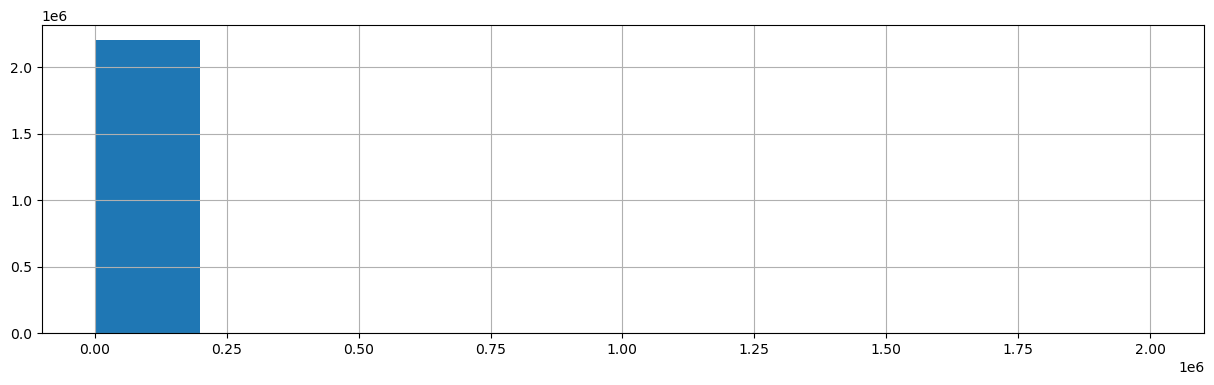

In [36]:
#убираем выбросы по total_revenue
base_info_client['total_revenue'].hist(figsize=(15, 4));

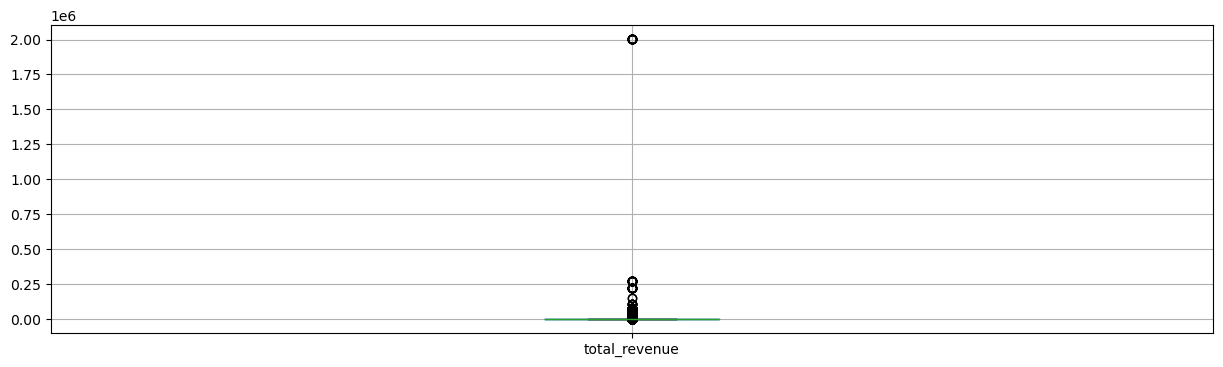

In [37]:
plt.figure(figsize=(15, 4))
base_info_client.boxplot('total_revenue')
plt.show()

In [38]:
np.percentile(base_info_client['total_revenue'], [90, 95, 99])

array([ 12.,  44., 244.])

In [39]:
#удалим по 99-му перцентилю
base_info_client = base_info_client[base_info_client['total_revenue'] < 242]

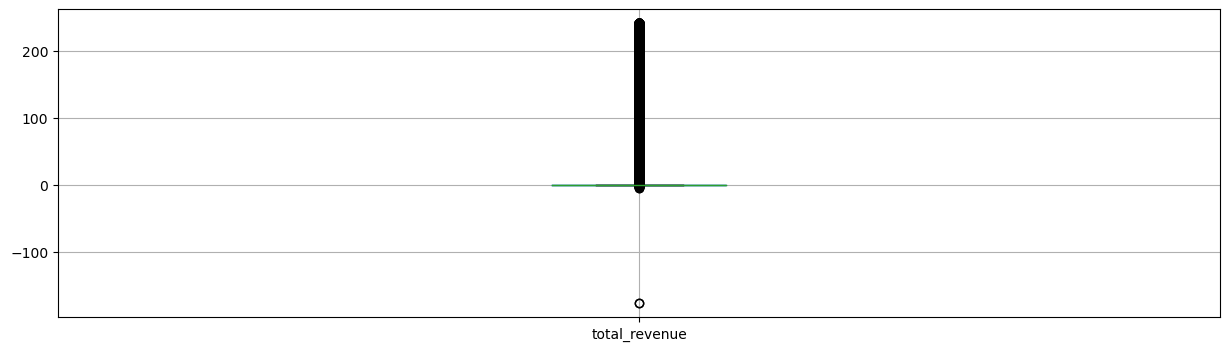

In [40]:
plt.figure(figsize=(15, 4))
base_info_client.boxplot('total_revenue')
plt.show()

In [41]:
# кол-во строк с total_revenue < 0
base_info_client[base_info_client['total_revenue'] < 0]['total_revenue'].count()

22

In [42]:
#земеним нулем то, что меньше нуля
base_info_client.loc[base_info_client['total_revenue'] < 0, ['total_revenue']] = 0

In [43]:
base_info_client.count()

id_client                      2185258
name_rf                        2185258
id_client_rf                   2185258
workersrange                   2185258
total_revenue                  2185258
companywithsameinfo            2185258
arbitrationcases               2185258
datefirstreg                   2185258
flag_site                      2185258
flag_business_center           2185258
flag_resident                  2185258
date_actual_data               2185258
flag_vk                        2185258
workersrange_is_known          2185258
workersrange_is_less_then_5    2185258
workersrange_is_more_then_5    2185258
dtype: int64

In [44]:
base_info_client['id_client_rf'].nunique()

2185258

**Финальный датасет**

In [45]:
# sales_clients
final_data_sales = sales_clients.merge(okved, on='id_client_rf', how='left')\
                  .merge(base_info_client, on='id_client_rf', how='left')\
                  .merge(address, on='id_client_rf', how='left')\
                  .merge(df_delta_date, on='id_client_rf', how='left')

# добамляем столбец с флагом покупки
final_data_sales['flag_sales'] = 1

final_data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9316 entries, 0 to 9315
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_client_rf                 9316 non-null   object        
 1   month_sale                   9316 non-null   datetime64[ns]
 2   sale_size                    9316 non-null   int32         
 3   sale_count                   9316 non-null   int64         
 4   Code_okved                   9296 non-null   object        
 5   Name_okved                   9296 non-null   object        
 6   Type_okved                   9296 non-null   float64       
 7   Industry                     9296 non-null   object        
 8   id_client                    8906 non-null   float64       
 9   name_rf                      8906 non-null   object        
 10  workersrange                 8906 non-null   float64       
 11  total_revenue                8906 non-null 

In [46]:
#добавляем столбец с количеством дней с момента регистрации
base_info_client['delta_date'] = base_info_client['datefirstreg']\
                                 .map(lambda x: (datetime.now() - x)/np.timedelta64(1, 'D')).astype(int)

In [47]:
# final_list
final_data_predict = final_list.merge(okved, how='left', on='id_client_rf' )\
                  .merge(base_info_client, how='left', on='id_client_rf')\
                  .merge(address, how='left', on='id_client_rf')

# добамляем столбец с флагом покупки
final_data_predict['flag_sales'] = 0

final_data_predict.count()                  

id_client_rf                   1950832
Code_okved                     1873054
Name_okved                     1873054
Type_okved                     1873054
Industry                       1872984
id_client                      1932954
name_rf                        1932954
workersrange                   1932954
total_revenue                  1932954
companywithsameinfo            1932954
arbitrationcases               1932954
datefirstreg                   1932954
flag_site                      1932954
flag_business_center           1932954
flag_resident                  1932954
date_actual_data               1932954
flag_vk                        1932954
workersrange_is_known          1932954
workersrange_is_less_then_5    1932954
workersrange_is_more_then_5    1932954
delta_date                     1932954
flag_provider                   379598
nflag_have_free_ports           379598
latitude                        338226
longitude                       338226
ETTH                     

In [48]:
concat_data = final_data_predict[final_data_predict['Оптика'].isna() == False]

In [49]:
# Создаем таблицу из final_data_sales и 8000 случайных строк final_data_predict
train_data = pd.concat([final_data_sales, concat_data.sample(8000)], ignore_index=True)
# Заменяем в столбцах 'month_sale','sale_size','sale_count' NaN
train_data['month_sale'] = train_data['month_sale'].fillna(0)
train_data['sale_size'] = train_data['sale_size'].fillna(0)
train_data['sale_count'] = train_data['sale_count'].fillna(0)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17316 entries, 0 to 17315
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_client_rf                 17316 non-null  object        
 1   month_sale                   17316 non-null  object        
 2   sale_size                    17316 non-null  float64       
 3   sale_count                   17316 non-null  float64       
 4   Code_okved                   17272 non-null  object        
 5   Name_okved                   17272 non-null  object        
 6   Type_okved                   17272 non-null  float64       
 7   Industry                     17272 non-null  object        
 8   id_client                    16635 non-null  float64       
 9   name_rf                      16635 non-null  object        
 10  workersrange                 16635 non-null  float64       
 11  total_revenue                16635 non-nu

In [50]:
# Анализ пропусков
train_data.isna().sum().sort_values(ascending=False)

longitude                      2269
latitude                       2269
unknown                        1208
PON                            1208
Оптика                         1208
FTTx                           1208
ETTH                           1208
nflag_have_free_ports          1208
flag_provider                  1208
БШПД                           1208
xDSL                           1208
flag_resident                   681
workersrange_is_more_then_5     681
workersrange_is_less_then_5     681
workersrange_is_known           681
flag_vk                         681
date_actual_data                681
flag_business_center            681
datefirstreg                    681
arbitrationcases                681
companywithsameinfo             681
total_revenue                   681
workersrange                    681
name_rf                         681
id_client                       681
flag_site                       681
delta_date                      271
Industry                    

In [51]:
columns_list = ['arbitrationcases', 'flag_site', 'flag_business_center', 'flag_resident',
                         'flag_vk', 'flag_provider', 'nflag_have_free_ports', 'ETTH', 'FTTx', 'PON',
                         'unknown', 'xDSL', 'БШПД', 'Оптика', 'delta_date', 'workersrange']

for i in columns_list:
    train_data[i] = train_data[i].fillna(value=0)

In [52]:
train_data = train_data.dropna()

In [53]:
train_data.columns

Index(['id_client_rf', 'month_sale', 'sale_size', 'sale_count', 'Code_okved',
       'Name_okved', 'Type_okved', 'Industry', 'id_client', 'name_rf',
       'workersrange', 'total_revenue', 'companywithsameinfo',
       'arbitrationcases', 'datefirstreg', 'flag_site', 'flag_business_center',
       'flag_resident', 'date_actual_data', 'flag_vk', 'workersrange_is_known',
       'workersrange_is_less_then_5', 'workersrange_is_more_then_5',
       'flag_provider', 'nflag_have_free_ports', 'latitude', 'longitude',
       'ETTH', 'FTTx', 'PON', 'unknown', 'xDSL', 'БШПД', 'Оптика',
       'delta_date', 'flag_sales'],
      dtype='object')

In [274]:
#собираем x
x = train_data[['workersrange', 'total_revenue', 'arbitrationcases', 'flag_site',
                             'flag_business_center', 'flag_resident', 'flag_vk', 'flag_provider',
                             'nflag_have_free_ports', 'ETTH', 'FTTx', 'PON', 'unknown', 'xDSL',
                             'БШПД', 'Оптика', 'delta_date']]

In [55]:
# Раскладываем индустрии из поля Industry по разным полям
#x = pd.get_dummies(x, drop_first= True)
#x = pd.get_dummies(x, drop_first= True)

In [56]:
x.columns

Index(['workersrange', 'total_revenue', 'arbitrationcases', 'flag_site',
       'flag_business_center', 'flag_resident', 'flag_vk', 'flag_provider',
       'nflag_have_free_ports', 'ETTH', 'FTTx', 'PON', 'unknown', 'xDSL',
       'БШПД', 'Оптика', 'delta_date'],
      dtype='object')

In [57]:
x.shape[0]

14411

### Анализ мультиколлинеарности

In [58]:
#матрица корреляции
x[['workersrange', 'total_revenue', 'arbitrationcases', 'flag_site',
                             'flag_business_center', 'flag_resident', 'flag_vk', 'flag_provider',
                             'nflag_have_free_ports', 'delta_date']].corr()

,workersrange,total_revenue,arbitrationcases,flag_site,flag_business_center,flag_resident,flag_vk,flag_provider,nflag_have_free_ports,delta_date
workersrange,1.000000,-0.002834,0.011274,0.011088,0.019508,-0.005178,-0.004961,0.003560,0.007792,-0.004541
total_revenue,-0.002834,1.000000,0.029247,0.153051,0.004375,-0.051724,-0.038375,0.044064,-0.019290,0.101630
arbitrationcases,0.011274,0.029247,1.000000,0.030763,0.009194,-0.006807,0.000536,0.010135,-0.003464,0.003228
flag_site,0.011088,0.153051,0.030763,1.000000,0.159043,0.189721,0.393753,0.260717,0.013178,-0.027163
flag_business_center,0.019508,0.004375,0.009194,0.159043,1.000000,-0.027657,0.200977,0.165461,0.078709,-0.027121
flag_resident,-0.005178,-0.051724,-0.006807,0.189721,-0.027657,1.000000,0.312097,0.246773,0.128188,-0.069392
flag_vk,-0.004961,-0.038375,0.000536,0.393753,0.200977,0.312097,1.000000,0.222185,0.057377,-0.062535
flag_provider,0.003560,0.044064,0.010135,0.260717,0.165461,0.246773,0.222185,1.000000,0.161556,-0.148805
nflag_have_free_ports,0.007792,-0.019290,-0.003464,0.013178,0.078709,0.128188,0.057377,0.161556,1.000000,0.084094
delta_date,-0.004541,0.101630,0.003228,-0.027163,-0.027121,-0.069392,-0.062535,-0.148805,0.084094,1.000000


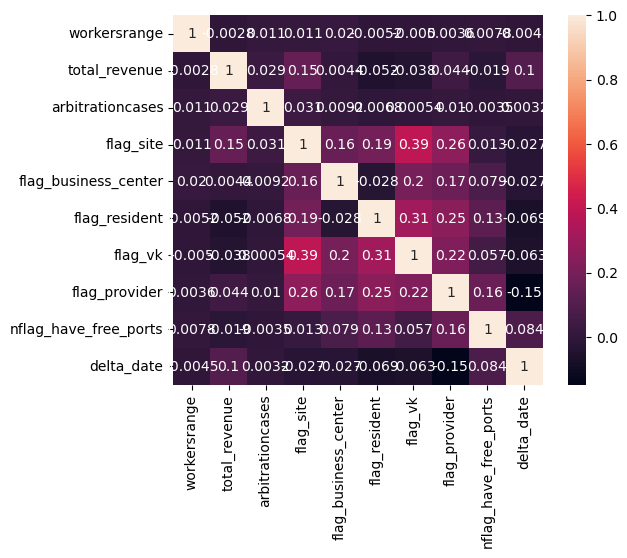

In [59]:
#тепловая карты
corr_matrix = x[['workersrange', 'total_revenue', 'arbitrationcases', 'flag_site',
                             'flag_business_center', 'flag_resident', 'flag_vk', 'flag_provider',
                             'nflag_have_free_ports', 'delta_date']].corr()
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, square=True)
plt.show()

Мультиколлинеарность очень слабая. Можно продолжать исследование.

In [159]:
train_data.columns

Index(['id_client_rf', 'month_sale', 'sale_size', 'sale_count', 'Code_okved',
       'Name_okved', 'Type_okved', 'Industry', 'id_client', 'name_rf',
       'workersrange', 'total_revenue', 'companywithsameinfo',
       'arbitrationcases', 'datefirstreg', 'flag_site', 'flag_business_center',
       'flag_resident', 'date_actual_data', 'flag_vk', 'workersrange_is_known',
       'workersrange_is_less_then_5', 'workersrange_is_more_then_5',
       'flag_provider', 'nflag_have_free_ports', 'latitude', 'longitude',
       'ETTH', 'FTTx', 'PON', 'unknown', 'xDSL', 'БШПД', 'Оптика',
       'delta_date', 'flag_sales'],
      dtype='object')

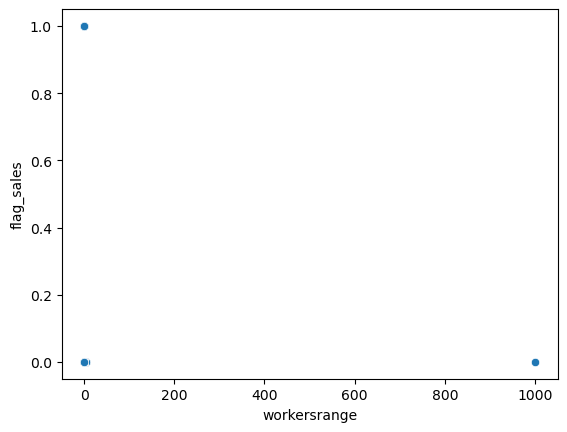

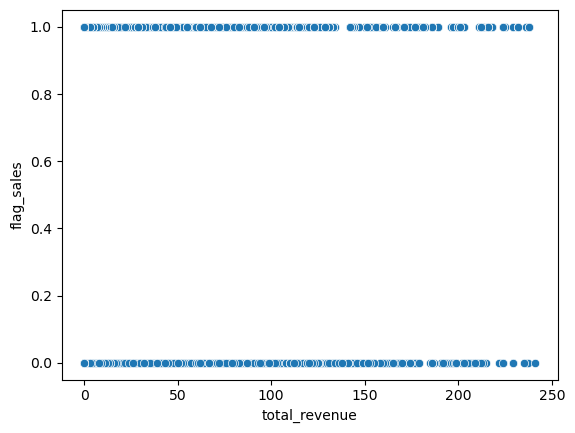

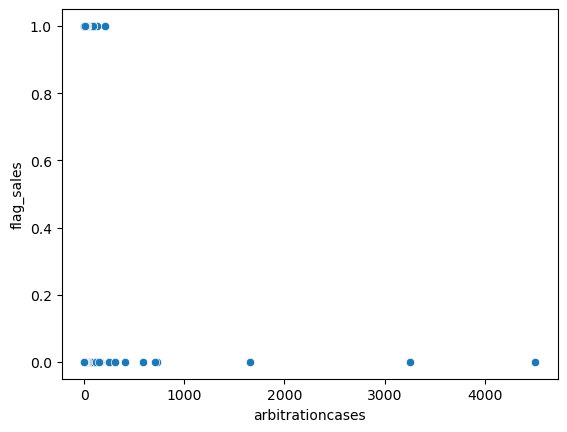

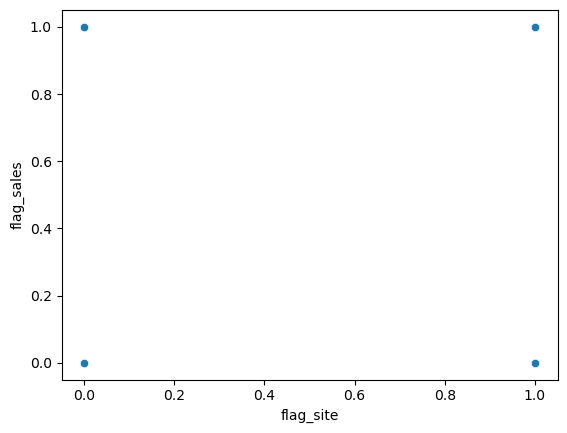

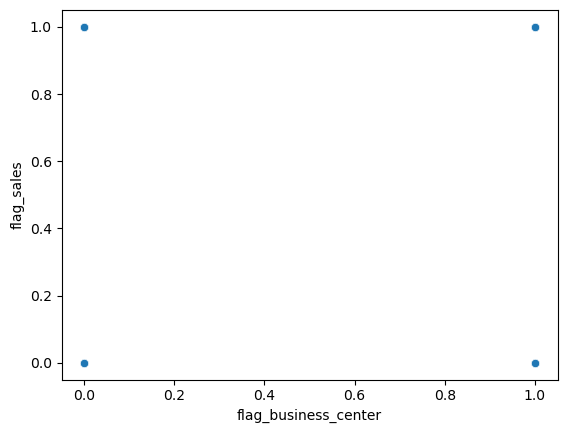

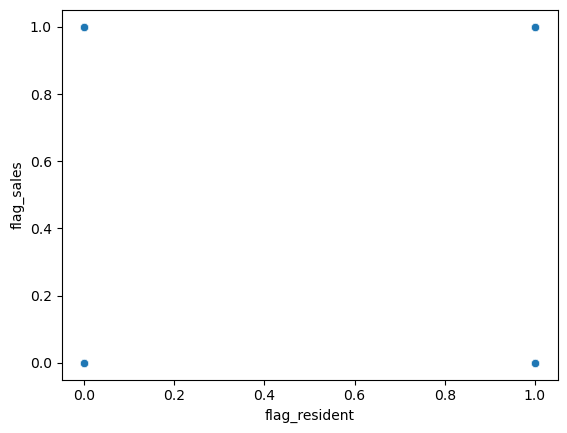

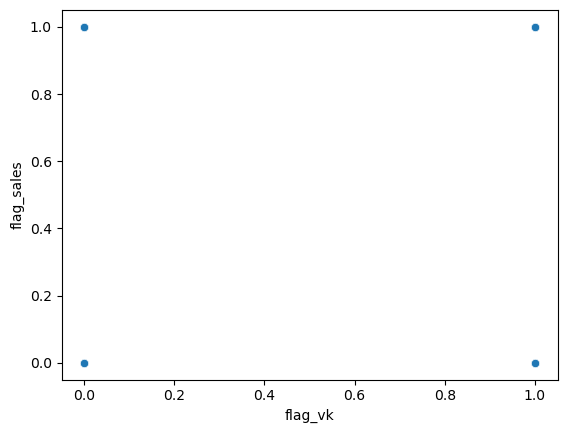

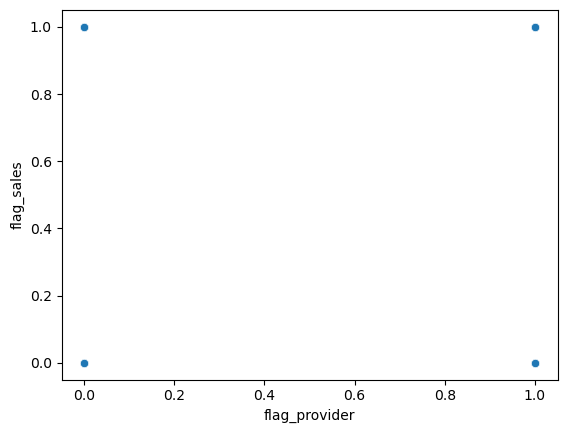

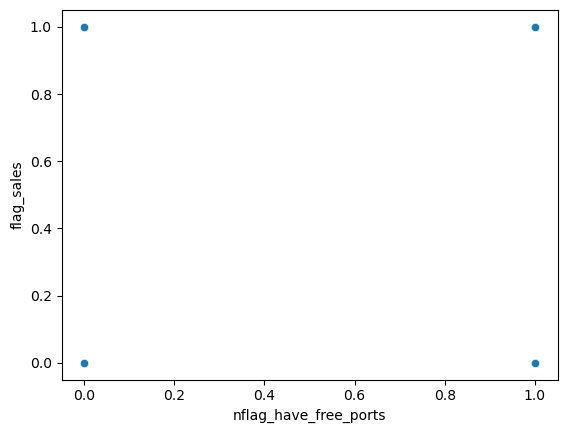

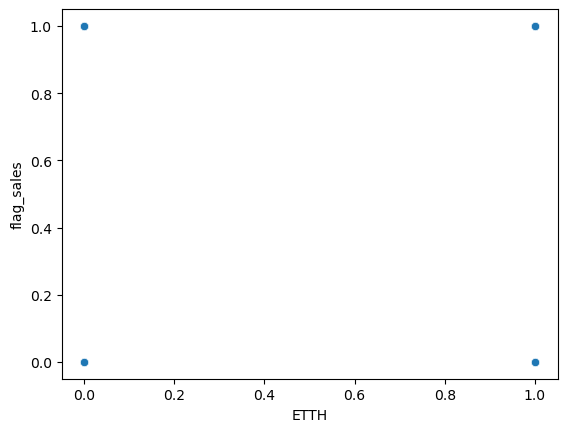

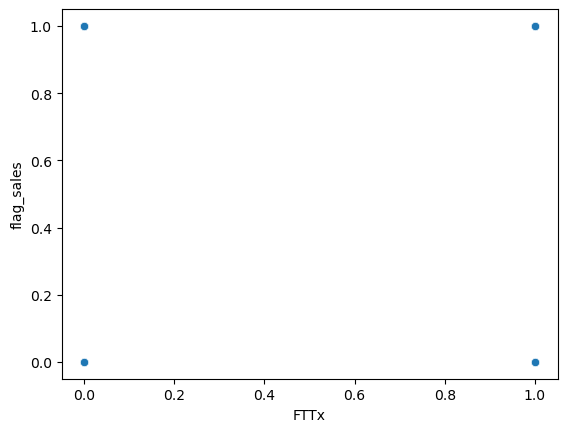

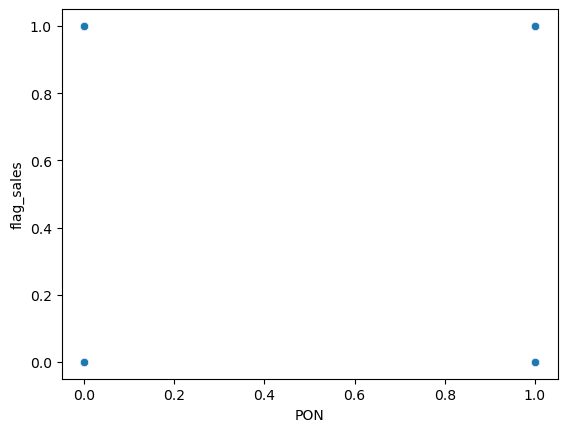

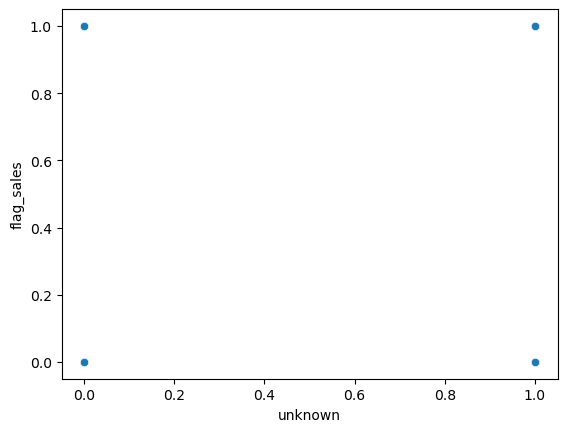

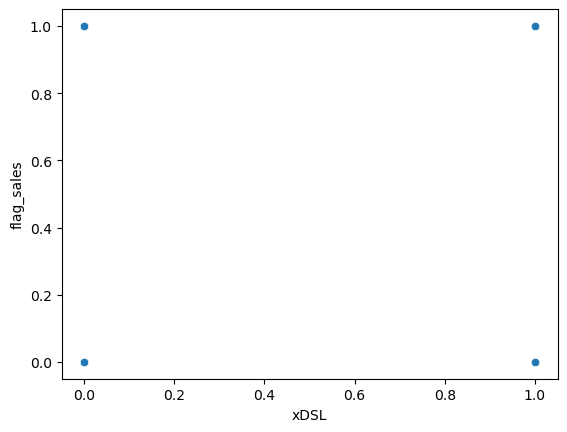

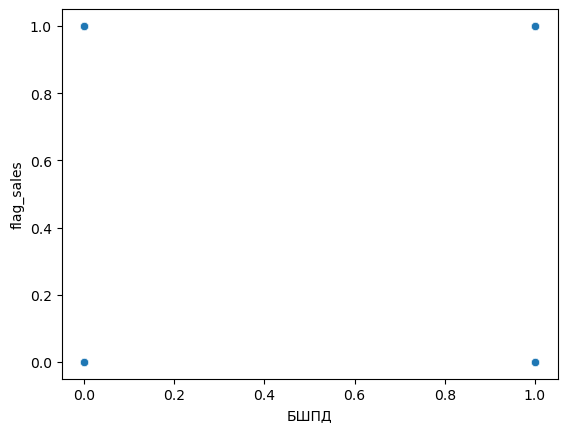

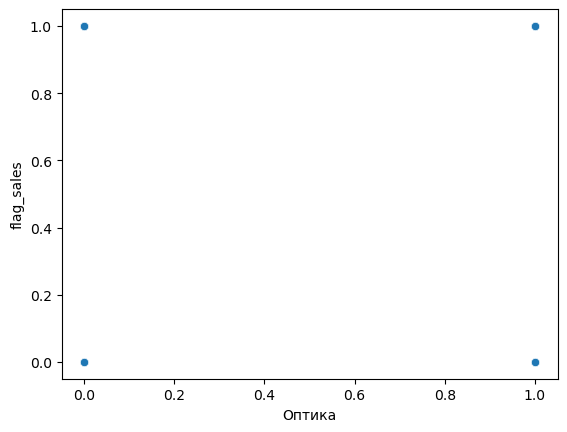

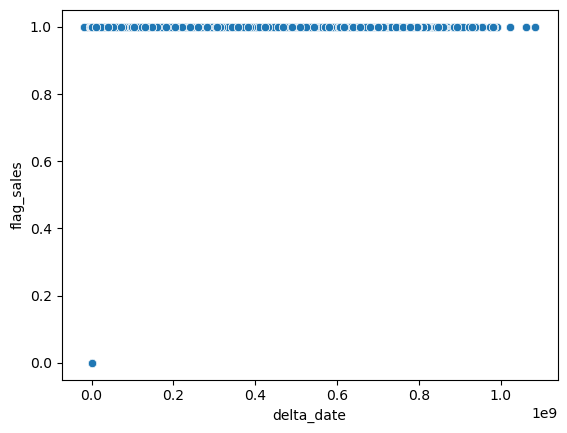

In [157]:
#диаграммы рассеяния для взаимосвязи показателей с целевой переменной
data = train_data[['workersrange', 'total_revenue', 'arbitrationcases', 'flag_site',
                             'flag_business_center', 'flag_resident', 'flag_vk', 'flag_provider',
                             'nflag_have_free_ports', 'ETTH', 'FTTx', 'PON', 'unknown', 'xDSL',
                             'БШПД', 'Оптика', 'delta_date', 'flag_sales']]

for col in data.drop('flag_sales', axis = 1).columns:
    sns.scatterplot(data=data, x=col, y=data['flag_sales'])
    plt.show()

**Здесь особо какой-то зависимости не видно, потому что, в основном категориальные данные и распределены неравномерно.**

## 2. Реализация алгоритмов машинного обучения

Реализуем следующие алгоритмы машинного обучения:

- логистическая регрессия (с решателями liblinear, sag и saga),
- дерево принятия решений,
- случайный лес,
- градиентный бустинг.

Cначала разделим выборки на обучающую/валидационную, проведем стандартизацию данных. Далее сделаем прогноз, сравним метрики и выберем лучшие модели.

### Обучение с учителем: бинарная классификация

**Бинарную классификация, как и кластеризацию, будем делать без индустрии, т.к. при ее добавлении в модель качество ухудшилось.**

In [256]:
#без индустрии

x = train_data[['workersrange', 'total_revenue', 'arbitrationcases', 'flag_site',
                             'flag_business_center', 'flag_resident', 'flag_vk', 'flag_provider',
                             'nflag_have_free_ports', 'ETTH', 'FTTx', 'PON', 'unknown', 'xDSL',
                             'БШПД', 'Оптика', 'delta_date']]

# Раскладываем индустрии из поля Industry по разным полям
#x = pd.get_dummies(x, drop_first= True)
#x = pd.get_dummies(x, drop_first= True)

In [217]:
y = train_data['flag_sales']

In [218]:
print('Получившееся распределение по группам:\n', y.value_counts())

Получившееся распределение по группам:
 1    7562
0    6849
Name: flag_sales, dtype: int64


In [219]:
#Разбиение выборки на обучающую и валидационную
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#стандартизация
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [220]:
#зададим функцию для расчета разных моделей бинарной классификации:
def binary_class_func(m, X_train, X_test, y_train, y_test):
    model = m
    model.fit(X_train_st, y_train)
    probabilities = model.predict_proba(X_test)[:, 1]
    predictions = model.predict(X_test)
    print('\n', m, '\n')
    print('Accuracy (доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision (точность): {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall (полнота): {:.2f}'.format(recall_score(y_test, predictions)))
    print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
#    print('AUC-ROC (площадь под кривой ошибок): {:.2f}'.format(roc_auc = roc_auc_score(y_test, probabilities[:,1])))

In [221]:
#стандартная логистическая регрессия
binary_class_func(LogisticRegression(solver='liblinear'), X_train_st, X_test_st, y_train, y_test)


 LogisticRegression(solver='liblinear') 

Accuracy (доля правильных ответов): 0.93
Precision (точность): 0.96
Recall (полнота): 0.91
F1: 0.93


In [222]:
#логистическая регрессия с решателем sag (L2)
binary_class_func(LogisticRegression(solver='sag'), X_train_st, X_test_st, y_train, y_test)


 LogisticRegression(solver='sag') 

Accuracy (доля правильных ответов): 0.91
Precision (точность): 0.94
Recall (полнота): 0.89
F1: 0.91


C:\Users\Anna\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Выберем эту модель, т.к. большое число факторов, поэтому L-2 регуляция здесь более подходящая.**

In [223]:
#логистическая регрессия с решателем saga
binary_class_func(LogisticRegression(solver='saga'), X_train_st, X_test_st, y_train, y_test)


 LogisticRegression(solver='saga') 

Accuracy (доля правильных ответов): 0.90
Precision (точность): 0.93
Recall (полнота): 0.88
F1: 0.90


C:\Users\Anna\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [224]:
#дерево принятия решений
binary_class_func(DecisionTreeClassifier(), X_train_st, X_test_st, y_train, y_test)


 DecisionTreeClassifier() 

Accuracy (доля правильных ответов): 1.00
Precision (точность): 1.00
Recall (полнота): 1.00
F1: 1.00


In [225]:
#случайный лес
binary_class_func(RandomForestClassifier(n_estimators = 2), X_train_st, X_test_st, y_train, y_test)


 RandomForestClassifier(n_estimators=2) 

Accuracy (доля правильных ответов): 0.99
Precision (точность): 1.00
Recall (полнота): 0.99
F1: 0.99


Здесь пробовали разное количество дереьев, но выше 2 со 100% вероятностью угадывает, значит слишком переобучается. Решили оставить 2.

In [226]:
#градиентный бустинг
binary_class_func(GradientBoostingClassifier(n_estimators = 2), X_train_st, X_test_st, y_train, y_test)


 GradientBoostingClassifier(n_estimators=2) 

Accuracy (доля правильных ответов): 1.00
Precision (точность): 1.00
Recall (полнота): 1.00
F1: 1.00


Эта модель при любом количестве итераций угадывает со 100% вероятностью.

In [227]:
#метод опорных векторов
#binary_class_func(SVC(kernel='linear'), X_train_st, X_test_st, y_train, y_test)

In [228]:
#метод K-ближайших соседей
#binary_class_func(KNeighborsRegressor(n_neighbors=5), X_train_st, X_test_st, y_train, y_test)

Также можно доработать модель логистической регрессии, поэкспериментировав с порогом отнесения к классу вероятных клиентов. Поскольку нам важно не потерять потенциального клиента, то порог будем постепенно уменьшать. В качестве пороговых значений будем использовать 0.45, 0.40, 0.35 и 0.30.

In [229]:
model_log = LogisticRegression(solver='liblinear', random_state=0)
model_log.fit(X_train_st, y_train)
predictions = model_log.predict(X_test_st)
probabilities = model_log.predict_proba(X_test_st)[:,1]
print('Accuracy (доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision (точность): {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall (полнота): {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy (доля правильных ответов): 0.93
Precision (точность): 0.96
Recall (полнота): 0.91
F1: 0.93


In [230]:
thresholds = [0.45, 0.4, 0.35, 0.3]

for i in thresholds:
    custom_predictions = [0 if i < threshold else 1 for i in probabilities]
    print('Метрики для прогноза с порогом ', i)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, custom_predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, custom_predictions)))
    print('F1: {:.2f}'.format(f1_score(y_test, custom_predictions)))

Метрики для прогноза с порогом  0.45
Accuracy: 0.93
Precision: 0.91
Recall: 0.95
F1: 0.93
Метрики для прогноза с порогом  0.4
Accuracy: 0.93
Precision: 0.91
Recall: 0.95
F1: 0.93
Метрики для прогноза с порогом  0.35
Accuracy: 0.93
Precision: 0.91
Recall: 0.95
F1: 0.93
Метрики для прогноза с порогом  0.3
Accuracy: 0.93
Precision: 0.91
Recall: 0.95
F1: 0.93


### Обучение без учителя: кластеризация

Для кластеризации потенциальных клиентов реализуем алгоритм на основе метода к-средних (k-means).

In [231]:
#стандартизация
sc = StandardScaler()
x_sc = sc.fit_transform(x)

#модель
km = KMeans(n_clusters=2, random_state=0)
labels = km.fit_predict(x_sc)
x['clusters'] = labels

print('Средние значения признаков по кластерам \n', x.groupby(['clusters']).mean())

Средние значения признаков по кластерам 
           workersrange  total_revenue  arbitrationcases  flag_site  \
clusters                                                             
0             0.003616       9.475169          3.607040   0.388621   
1             0.098899      10.604307          2.144402   0.358667   

          flag_business_center  flag_resident   flag_vk  flag_provider  \
clusters                                                                 
0                     0.101254       0.281581  0.263259       0.831244   
1                     0.175777       0.261035  0.255578       0.850531   

          nflag_have_free_ports      ETTH      FTTx       PON   unknown  \
clusters                                                                  
0                      0.161283  0.049662  0.000723  0.072806  0.925506   
1                      0.675046  0.425509  0.037903  0.065283  0.250122   

              xDSL      БШПД    Оптика    delta_date  
clusters                

C:\Users\Anna\AppData\Local\Temp\ipykernel_10168\4132082672.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['clusters'] = labels


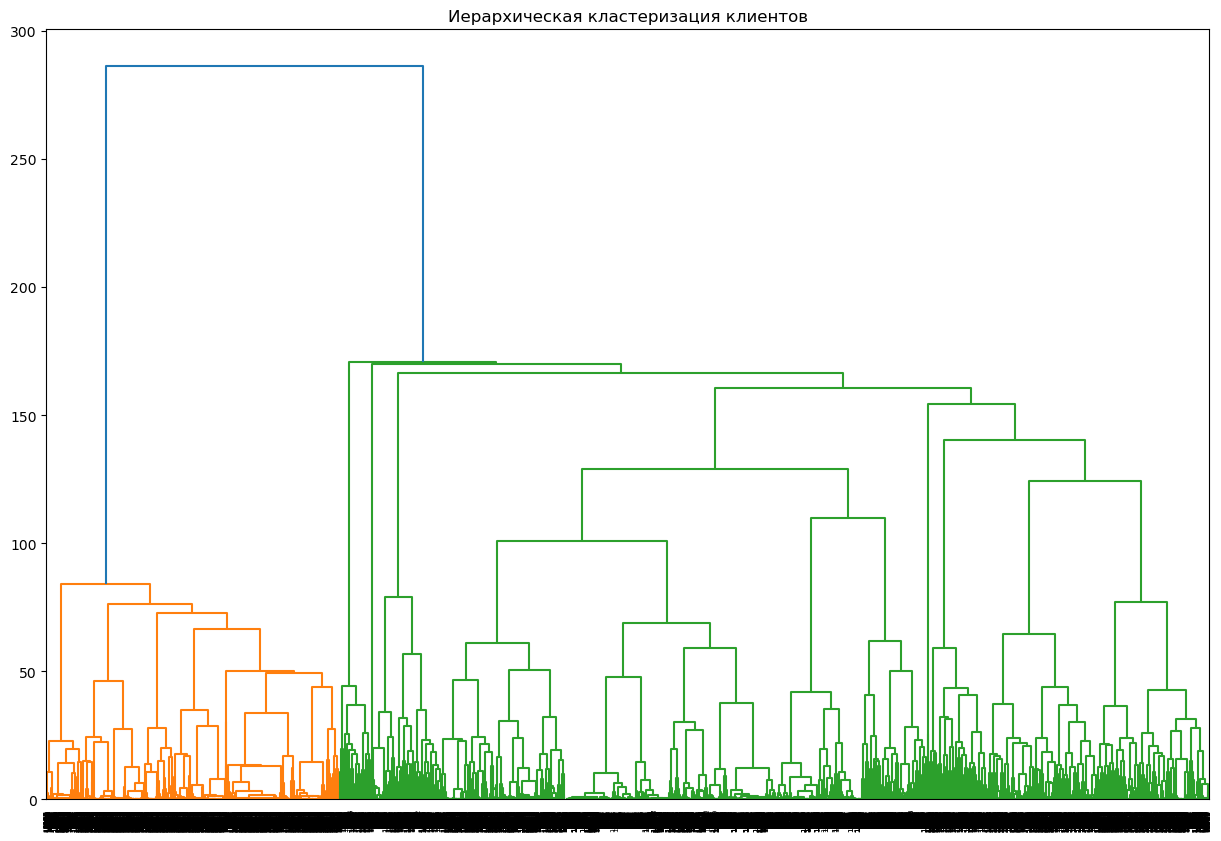

In [232]:
#график кластеризации
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.show()

In [233]:
# Метрика силуэта
print('Silhouette score (метрика силуэта): {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette score (метрика силуэта): 0.24


Наглядный пример для теоремы невозможности Клейнберга.

### Уменьшение размерности данных с помощью метода главных компонент

Для того чтобы лучше понять, как взаимосвязаны между собой факторы, влияющие на склонность клиетов к покупке воспользуемся методом PCA.

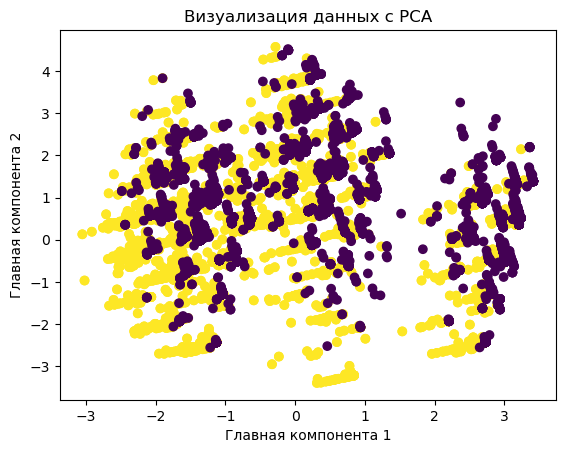

In [234]:
# Применение PCA с 2мя компонентами
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_sc)

# Визуализация
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis')
plt.title("Визуализация данных с PCA")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

Посмотрим, какие факторы больше всего повлияли на эти компоненты.

In [235]:
# Получение собственных векторов (весов) главных компонент
eigen_vectors = pca.components_
eigen_vectors

array([[-0.00437961, -0.01116246,  0.00488508,  0.08590995, -0.01790347,
         0.08972183,  0.08899279,  0.03417437, -0.26364661, -0.21845457,
        -0.0656303 , -0.02234083,  0.44811384, -0.46711519,  0.44811384,
        -0.46711519, -0.12227048],
       [ 0.00630754,  0.06115528,  0.01241409,  0.42188241,  0.28999353,
         0.34374455,  0.44944414,  0.41331504,  0.24814976,  0.26527906,
         0.09442481, -0.0321932 ,  0.16495482,  0.14956282,  0.16495482,
         0.14956282, -0.04397115]])

 Попробуем использовать метод главных компонент для улучшения качества кластеризации.

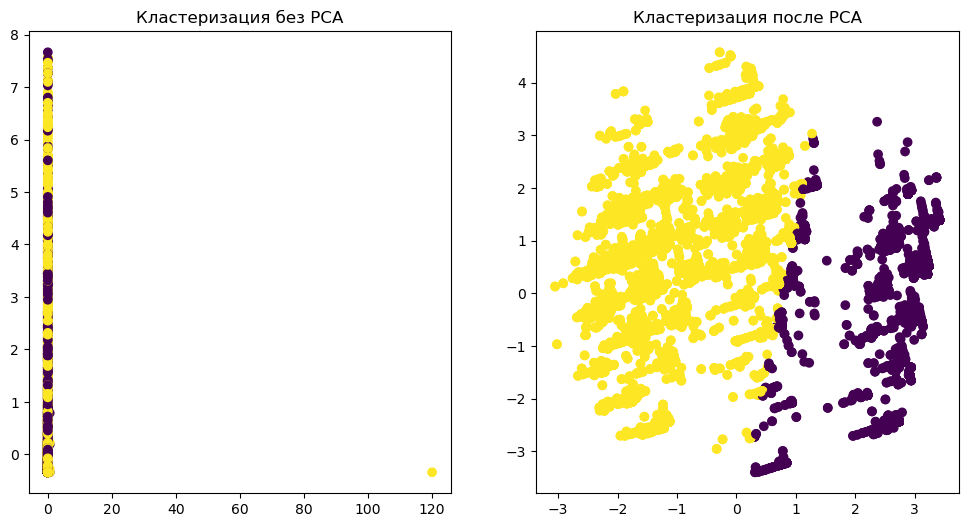

In [236]:
# Кластеризация после применения PCA
kmeans_pca = KMeans(n_clusters=2)
labels_pca = kmeans_pca.fit_predict(x_pca)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(x_sc[:, 0], x_sc[:, 1], c=labels, cmap='viridis')
plt.title("Кластеризация без PCA")
plt.subplot(122)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_pca, cmap='viridis')
plt.title("Кластеризация после PCA")
plt.show()

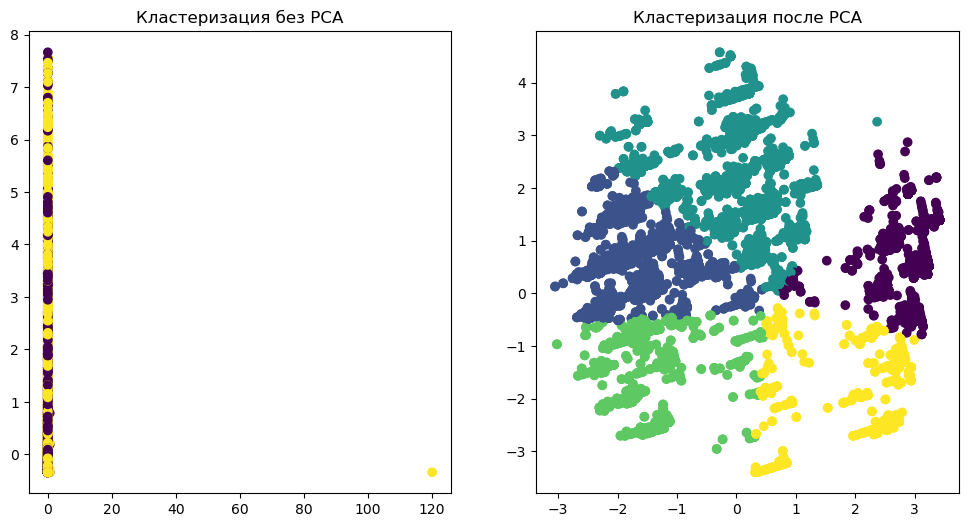

In [241]:
#Для 5 кластеров
# Кластеризация после применения PCA
kmeans_pca = KMeans(n_clusters=5)
labels_pca = kmeans_pca.fit_predict(x_pca)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(x_sc[:, 0], x_sc[:, 1], c=labels, cmap='viridis')
plt.title("Кластеризация без PCA")
plt.subplot(122)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_pca, cmap='viridis')
plt.title("Кластеризация после PCA")
plt.show()

In [237]:
# Метрика силуэта для 5 кластеров
kmeans_pca = KMeans(n_clusters=5)
labels_pca = kmeans_pca.fit_predict(x_pca)

print('Silhouette score (метрика силуэта) для 5 кластеров: {:.2f}'.format(silhouette_score(x_sc, labels_pca)))

Silhouette score (метрика силуэта) для 5 кластеров: 0.15


In [239]:
# Метрика силуэта для 2 кластеров
kmeans_pca = KMeans(n_clusters=3)
labels_pca = kmeans_pca.fit_predict(x_pca)

print('Silhouette score (метрика силуэта) для 2 кластеров: {:.2f}'.format(silhouette_score(x_sc, labels_pca)))

Silhouette score (метрика силуэта) для 2 кластеров: 0.23


Все равно осталась слабой

## 3. Портрет потенциального клиента

In [247]:
def get_distribution(feat):
    data = final_data_sales.pivot_table(index=feat, values='id_client_rf', aggfunc='count')\
                           .rename({'id_client_rf':'number'}, axis=1)\
                           .sort_values(by='number', ascending=False)\
                           .reset_index()
    data['percent'] = (data['number'] / data['number'].sum()).map(lambda x: "{:.1%}".format(x))
    return data

In [254]:
list_of_features = ['total_revenue', 'arbitrationcases', 'flag_site',
       'flag_business_center', 'flag_resident', 'flag_vk', 'flag_provider',
       'nflag_have_free_ports', 'ETTH', 'FTTx', 'PON', 'unknown', 'xDSL',
       'БШПД', 'Оптика', 'name_rf', 'Code_okved', 'Name_okved', 'Industry']

for i in list_of_features:
    print('\n', i)
    print(get_distribution(i))


 total_revenue
     total_revenue  number percent
0              0.0    6496   72.9%
1              1.0     188    2.1%
2              2.0     120    1.3%
3              3.0      98    1.1%
4              4.0      96    1.1%
..             ...     ...     ...
181          132.0       2    0.0%
182          130.0       2    0.0%
183          127.0       2    0.0%
184          125.0       2    0.0%
185          238.0       2    0.0%

[186 rows x 3 columns]

 arbitrationcases
    arbitrationcases  number percent
0                0.0    7344   82.5%
1                1.0     494    5.5%
2                2.0     228    2.6%
3                3.0     166    1.9%
4                4.0     134    1.5%
5                5.0      92    1.0%
6                6.0      66    0.7%
7                8.0      44    0.5%
8                7.0      40    0.4%
9               10.0      32    0.4%
10               9.0      28    0.3%
11              14.0      22    0.2%
12              15.0      20    0.2%
13 

### Функция для разметки компаний по удаленности от подключившихся

In [ ]:
'''

# Функция определения ближайших компаний
from tqdm.notebook import tqdm
from math import radians, sin, cos, sqrt, atan2
pbar = tqdm()
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c * 1000  # distance in meters

train_data['has_nearby_company'] = 0

pbar.reset(total=len(train_data))
for i, row in train_data.iterrows():
    lat1, lon1 = row['latitude'], row['longitude']
    for j, other_row in train_data.iterrows():
        if i != j:
            lat2, lon2 = other_row['latitude'], other_row['longitude']
            dist = haversine(lat1, lon1, lat2, lon2)
            if dist <= 50:
                train_data.at[i, 'has_nearby_company'] = 1
                break
    pbar.update()             
pbar.refresh()

train_data.head()

train_data.to_csv(r'C:\WORK\STUDY\GIT\Данные для хакатона\train_data.csv', index=False)

'''

**результат работы скрипта**

In [289]:
geo_marking = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\final_data_predict_geo_full.csv',
                         encoding = "utf-8")

C:\Users\Anna\AppData\Local\Temp\ipykernel_10168\3769502975.py:1: DtypeWarning: Columns (26,27,28,29,30,31,32,59,60,61,62,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  geo_marking = pd.read_csv(r'C:\Users\Anna\OneDrive\Рабочий стол\Данные хакатон\final_data_predict_geo_full.csv',


In [290]:
geo_marking.head()

,Unnamed: 0.1,id_client_rf,Code_okved_x,Name_okved_x,Type_okved_x,Industry_x,id_client_x,name_rf_x,workersrange_x,total_revenue_x,companywithsameinfo_x,arbitrationcases_x,datefirstreg_x,flag_site_x,flag_business_center_x,flag_resident_x,date_actual_data_x,flag_vk_x,workersrange_is_known_x,workersrange_is_less_then_5_x,workersrange_is_more_then_5_x,delta_date_x,flag_provider_x,nflag_have_free_ports_x,latitude_x,...,companywithsameinfo_y,arbitrationcases_y,datefirstreg_y,flag_site_y,flag_business_center_y,flag_resident_y,date_actual_data_y,flag_vk_y,workersrange_is_known_y,workersrange_is_less_then_5_y,workersrange_is_more_then_5_y,delta_date_y,flag_provider_y,nflag_have_free_ports_y,latitude_y,longitude_y,ETTH_y,FTTx_y,PON_y,unknown_y,xDSL_y,БШПД_y,Оптика_y,flag_sales_y,has_nearby_company
0,0,01768987_Ф04,93.0,Деятельность в области спорта прочая,1.0,Спорт,1768987.0,Ф04,0.0,0.0,1.0,0.0,2021-11-30,0.0,0.0,0.0,2021-11-30,0.0,0.0,0.0,0.0,697.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,01769012_Ф04,77.0,Прокат и аренда прочих предметов личного польз...,1.0,Аренда и лизинг,1769012.0,Ф04,0.0,0.0,1.0,0.0,2021-02-15,0.0,0.0,0.0,2021-02-15,0.0,0.0,0.0,0.0,985.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,01769016_Ф04,28.0,Производство генераторов для получения генерат...,1.0,Тяжелая промышленность,1769016.0,Ф04,0.0,0.0,1.0,0.0,2021-12-28,0.0,0.0,0.0,2021-12-28,0.0,0.0,0.0,0.0,669.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,01769018_Ф04,72.0,Научные исследования и разработки в области об...,1.0,"Инженерная\, проектная\, изыскательная и архит...",1769018.0,Ф04,0.0,0.0,1.0,0.0,2022-01-27,0.0,0.0,0.0,2022-01-27,0.0,0.0,0.0,0.0,639.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,01769044_Ф04,86.0,Деятельность больничных организаций,1.0,Медицина,1769044.0,Ф04,0.0,0.0,1.0,0.0,2021-12-09,0.0,0.0,0.0,2021-12-09,0.0,0.0,0.0,0.0,688.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
geo_marking.duplicated().sum()

0

In [305]:
geo = geo_marking[['id_client_rf', 'has_nearby_company']].dropna()

In [306]:
geo.count()

id_client_rf          10000
has_nearby_company    10000
dtype: int64

### Разметка потенциальных клиентов по склонности к подключению

In [318]:
#собираем x
final = final_data_predict.dropna()

X_test = X_test[['workersrange', 'total_revenue', 'arbitrationcases', 'flag_site',
                             'flag_business_center', 'flag_resident', 'flag_vk', 'flag_provider',
                             'nflag_have_free_ports', 'ETTH', 'FTTx', 'PON', 'unknown', 'xDSL',
                             'БШПД', 'Оптика', 'delta_date']]

X_train = train_data[['workersrange', 'total_revenue', 'arbitrationcases', 'flag_site',
                             'flag_business_center', 'flag_resident', 'flag_vk', 'flag_provider',
                             'nflag_have_free_ports', 'ETTH', 'FTTx', 'PON', 'unknown', 'xDSL',
                             'БШПД', 'Оптика', 'delta_date']]
y_train = train_data['flag_sales']

**Вероятность подключения на основе логистической регрессии**

In [319]:
#Вероятность на основе лог регрессии

#стандартизация
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

model = LogisticRegression(solver='sag')
model.fit(X_train_st, y_train)
probabilities = model.predict_proba(X_test)[:, 1]
predictions = model.predict(X_test)

final['proba_log'] = probabilities

C:\Users\Anna\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Anna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Anna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Anna\AppData\Local\Temp\ipykernel_10168\3476384384.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['proba_log'] = probabilities


**Вероятность подключения на основе случайного леса**

In [321]:
X_test_2 = X_test
#Вероятность на основе слуйчайного леса
model = RandomForestClassifier(n_estimators = 2)
model.fit(X_train_st, y_train)
probabilities = model.predict_proba(X_test_2)[:, 1]
predictions = model.predict(X_test_2)

final['proba_rand_forest'] = probabilities

C:\Users\Anna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Anna\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Anna\AppData\Local\Temp\ipykernel_10168\313211001.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['proba_rand_forest'] = probabilities


**Вероятность подключения на основе лог регрессии и разметки клиентов по нахождению вблизи уже подключившихся**

In [322]:
marking = final.merge(geo, on='id_client_rf', how='left')

In [323]:
marking = marking[['id_client_rf', 'proba_log', 'proba_rand_forest', 'has_nearby_company']]

In [325]:
marking = marking.fillna(value=0)
marking

,id_client_rf,proba_log,proba_rand_forest,has_nearby_company
0,01505634_Ф04,1.0,1.0,0.0
1,01506021_Ф04,1.0,1.0,0.0
2,00365502_Ф10,1.0,0.5,0.0
3,00365770_Ф10,1.0,0.5,0.0
4,01556340_Ф10,1.0,1.0,0.0
...,...,...,...,...
325503,00643325_Ф10,1.0,1.0,0.0
325504,00358107_Ф10,1.0,1.0,0.0
325505,00358665_Ф10,1.0,1.0,0.0
325506,00358227_Ф10,1.0,1.0,0.0


In [327]:
marking['proba_log_and_geo'] = (marking['proba_log'] + marking['has_nearby_company'])/2

## Итоговый файл для прогнозирования

In [328]:
marking

,id_client_rf,proba_log,proba_rand_forest,has_nearby_company,proba_log_and_geo
0,01505634_Ф04,1.0,1.0,0.0,0.5
1,01506021_Ф04,1.0,1.0,0.0,0.5
2,00365502_Ф10,1.0,0.5,0.0,0.5
3,00365770_Ф10,1.0,0.5,0.0,0.5
4,01556340_Ф10,1.0,1.0,0.0,0.5
...,...,...,...,...,...
325503,00643325_Ф10,1.0,1.0,0.0,0.5
325504,00358107_Ф10,1.0,1.0,0.0,0.5
325505,00358665_Ф10,1.0,1.0,0.0,0.5
325506,00358227_Ф10,1.0,1.0,0.0,0.5


In [329]:
marking.to_csv('marking.csv', index = False)

## Общий вывод

1. В ходе анализа были скорректированы данные:
- добавлены/скорректированы заголовки, категориальные переменные преобразованы в числовые,
- вместо workersrange (т.к. только 20% ненулевые) создали 3 бинарных признака: известно ли количество сотрудников (0,1), до 5 человек сотрудников (0,1), более 5 сотрудников (0,1).
- companywithsameinfo пустые значения заполнили нулем, сделали допущение, если нет данных, то таковых нет.
- аналогично arbitrationcases.
- по дате актуализации информации date_actual_data пропуски заполнили датой регистрации (предположили, что данные просто не обновлялись)
- по tech_name пропуски заполнили заглушкой unknown + разбили на бинарные признаки по виду подключения.
- оставили только основной вид деятельности у ОКВЭД и перевели в бинарный вид индустрию,
- убрали выбросы по total_revenue,
- добавили столбец со временем с момента регистрации до покупки.
Получены 2 файла – для уже осуществившихся продаж (final_data_sales) и для потенциальных клиентов (final_data_predict).

2. Построены модели k-means кластеризации и бинарной классификации (логистическая регрессия (с решателями liblinear, sag и saga), дерево принятия решений, случайный лес, градиентный бустинг). Для моделей были использованы разные вариации сочетания признаков.

3. Размечены потенциальные клиенты по нахождению вблизи уже подключившихся.

4. Для разметки вероятности подключения были выбраны 3 модели:
- модель на основе сочетания лог регрессии и разметки клиентов по нахождению вблизи уже подключившихся;
- модель на основе случайного леса;
- модель на основе только лог регрессии.

Ссылка на схему DB:


[Схема](https://github.com/abakhmetev/hackathon_rtk/blob/main/Диаграмма%20DB.png "Схема DB") 